/opt/anaconda3/envs/CHE4230/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/envs/CHE4230/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


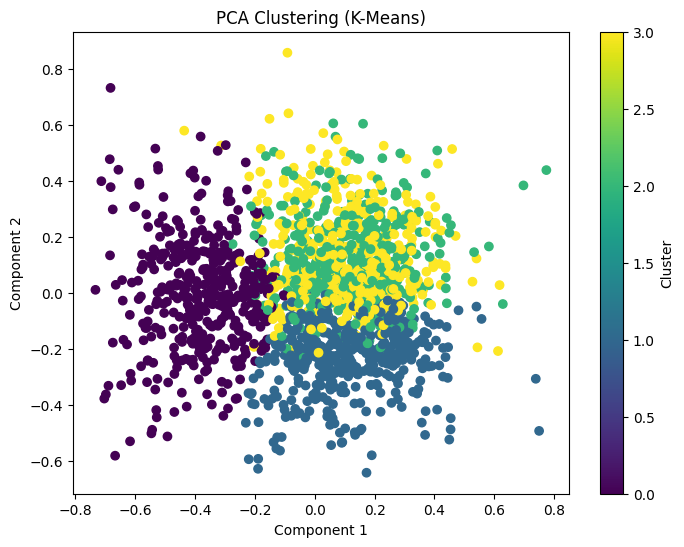

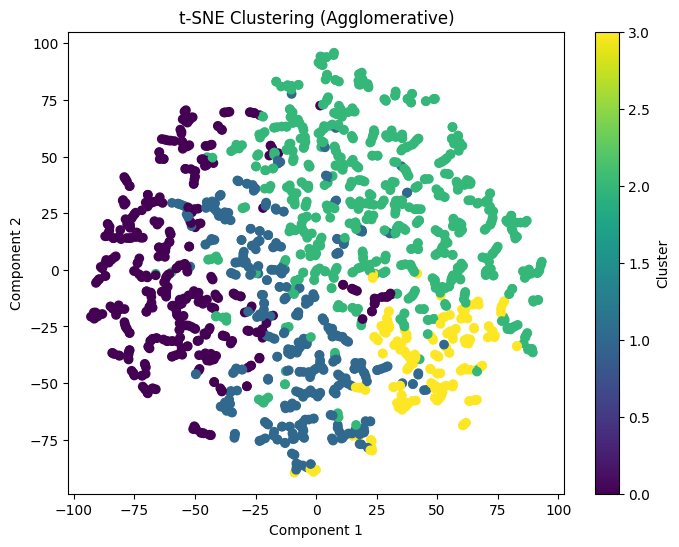

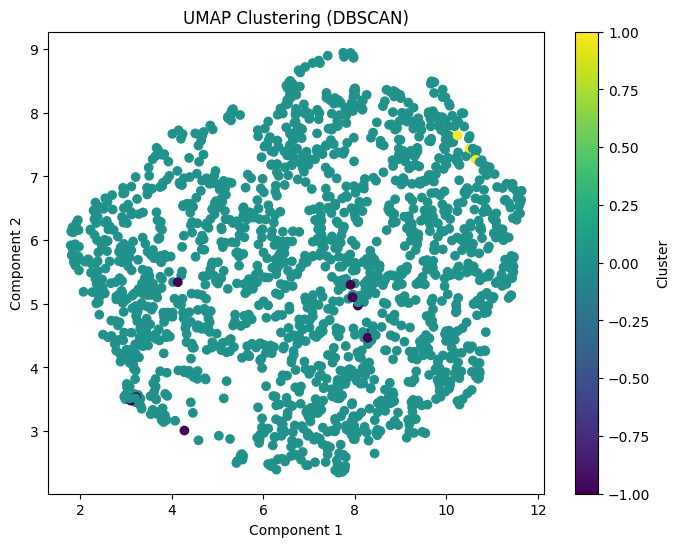

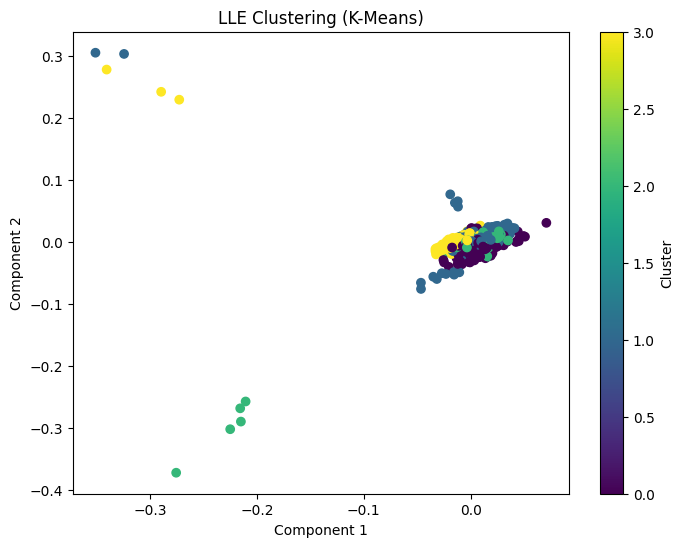

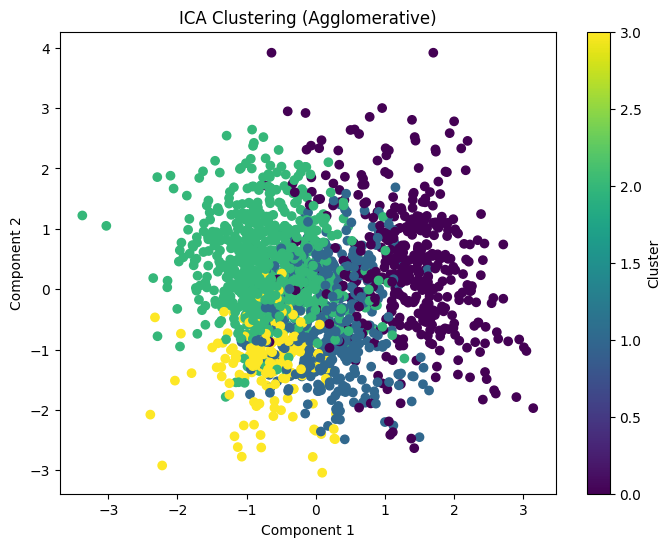

Cluster Distribution (DBSCAN):
DBSCAN_Cluster
 0    1750
-1       9
 1       5
Name: count, dtype: int64
Cluster Distribution (K-Means):
KMeans_Cluster
1    453
3    451
2    439
0    421
Name: count, dtype: int64
Cluster Distribution (Agglomerative):
Agglo_Cluster
2    738
0    434
1    406
3    186
Name: count, dtype: int64


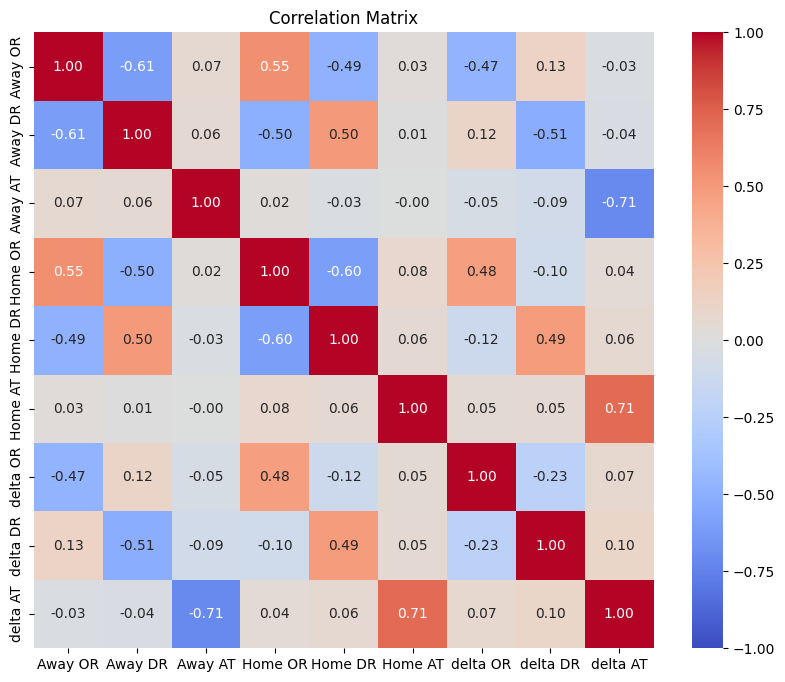

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

# Load dataset
df = pd.read_csv('/Users/kkelley/Desktop/CHE4230Project/SL311.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Round numeric columns to 2 decimal places for clarity
df = df.round(2)

# Select relevant features
features = ['Away OR', 'Away DR', 'Away AT', 
            'Home OR', 'Home DR', 'Home AT', 'delta OR', 'delta DR', 'delta AT']

X = df[features]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Dimensionality Reduction Methods
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_scaled)

tsne = TSNE(n_components=2, perplexity=5, learning_rate=100, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Apply Clustering Algorithms
dbscan = DBSCAN(eps=0.35, min_samples=4)
kmeans = KMeans(n_clusters=4, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=4)

df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
df['Agglo_Cluster'] = agglomerative.fit_predict(X_scaled)

# Visualization Function
def plot_dimensionality_reduction(X_transformed, title, cluster_column):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=df[cluster_column], cmap='viridis')
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(label='Cluster')
    plt.show()

# Visualizations
plot_dimensionality_reduction(X_pca, "PCA Clustering (K-Means)", "KMeans_Cluster")
plot_dimensionality_reduction(X_tsne, "t-SNE Clustering (Agglomerative)", "Agglo_Cluster")
plot_dimensionality_reduction(X_umap, "UMAP Clustering (DBSCAN)", "DBSCAN_Cluster")
plot_dimensionality_reduction(X_lle, "LLE Clustering (K-Means)", "KMeans_Cluster")
plot_dimensionality_reduction(X_ica, "ICA Clustering (Agglomerative)", "Agglo_Cluster")

# Print Cluster Distributions
print("Cluster Distribution (DBSCAN):")
print(df['DBSCAN_Cluster'].value_counts())
print("Cluster Distribution (K-Means):")
print(df['KMeans_Cluster'].value_counts())
print("Cluster Distribution (Agglomerative):")
print(df['Agglo_Cluster'].value_counts())

# Compute and visualize the correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()







Best Dimensionality Reduction Method: LLE
Outliers:
      Component 1  Component 2
5       -0.324282     0.302629
404     -0.289575     0.241642
504     -0.272648     0.228932
749     -0.215627    -0.267972
855     -0.214968    -0.289323
1128    -0.340589     0.277436
1199    -0.351049     0.304562
1429    -0.210556    -0.256935
1643    -0.275531    -0.371663
1719    -0.224976    -0.301599


/opt/anaconda3/envs/CHE4230/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


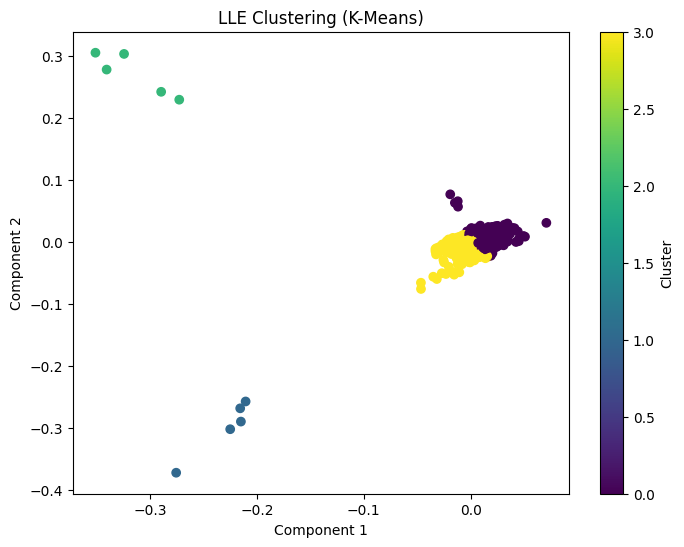

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_csv('/Users/kkelley/Desktop/CHE4230Project/SL311.csv')
df.dropna(inplace=True)
df = df.round(2)

# Select features
features = ['Away OR', 'Away DR', 'Away AT', 'Home OR', 'Home DR', 'Home AT', 'delta OR', 'delta DR', 'delta AT']
X = df[features]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Optimize Dimensionality Reduction
best_score, best_method, best_X = None, None, None
dim_reduction_methods = {
    'PCA': PCA(n_components=2),
    'LLE': LocallyLinearEmbedding(n_components=2, n_neighbors=10),
    't-SNE': TSNE(n_components=2, perplexity=5, learning_rate=100, random_state=42),
    'UMAP': UMAP(n_components=2, n_jobs=-1),
    'ICA': FastICA(n_components=2, random_state=42)
}

for name, method in dim_reduction_methods.items():
    X_transformed = method.fit_transform(X_scaled)
    inertia = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X_transformed).inertia_
    if best_score is None or inertia < best_score:
        best_score, best_method, best_X = inertia, name, X_transformed

print(f"Best Dimensionality Reduction Method: {best_method}")

# Apply Best Clustering Algorithm
kmeans = KMeans(n_clusters=4, random_state=42).fit(best_X)
df['Best_Cluster'] = kmeans.labels_

# LLE Outlier Detection
if best_method == 'LLE':
    lle_df = pd.DataFrame(best_X, columns=['Component 1', 'Component 2'])
    outliers = lle_df[(lle_df['Component 1'] < -0.2) | (lle_df['Component 2'] > 0.2)]
    print("Outliers:")
    print(outliers)

# Visualization Function
def plot_dimensionality_reduction(X_transformed, title, cluster_column):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=df[cluster_column], cmap='viridis')
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(label='Cluster')
    plt.show()

# Plot Best Clustering Result
plot_dimensionality_reduction(best_X, f"{best_method} Clustering (K-Means)", "Best_Cluster")
